## Machine Learning / Deep Learning workflow:
1. Formulate / Outline the problem
2. Identify inputs and outputs
3. Prepare data
4. Choose a pretrained model or start building architecture from scratch
5. Choose a loss function and optimizer
6. Train the model
7. Perform a Prediction/Classification
8. Measure performance
9. Refine the model
10. Save model

## 1. Formulate/outline the problem: penguin classification

Goal: predict a penguins’ species using the attributes available in this dataset (flipper length, beak length, beak width, body mass, and sex)

**Why?**

## 2. Identify inputs and outputs (inspect your data)

In [2]:
# Load our penguins dataset from the seaborn library
import seaborn as sns
penguins = sns.load_dataset('penguins')

In [3]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [4]:
penguins.shape

(344, 7)

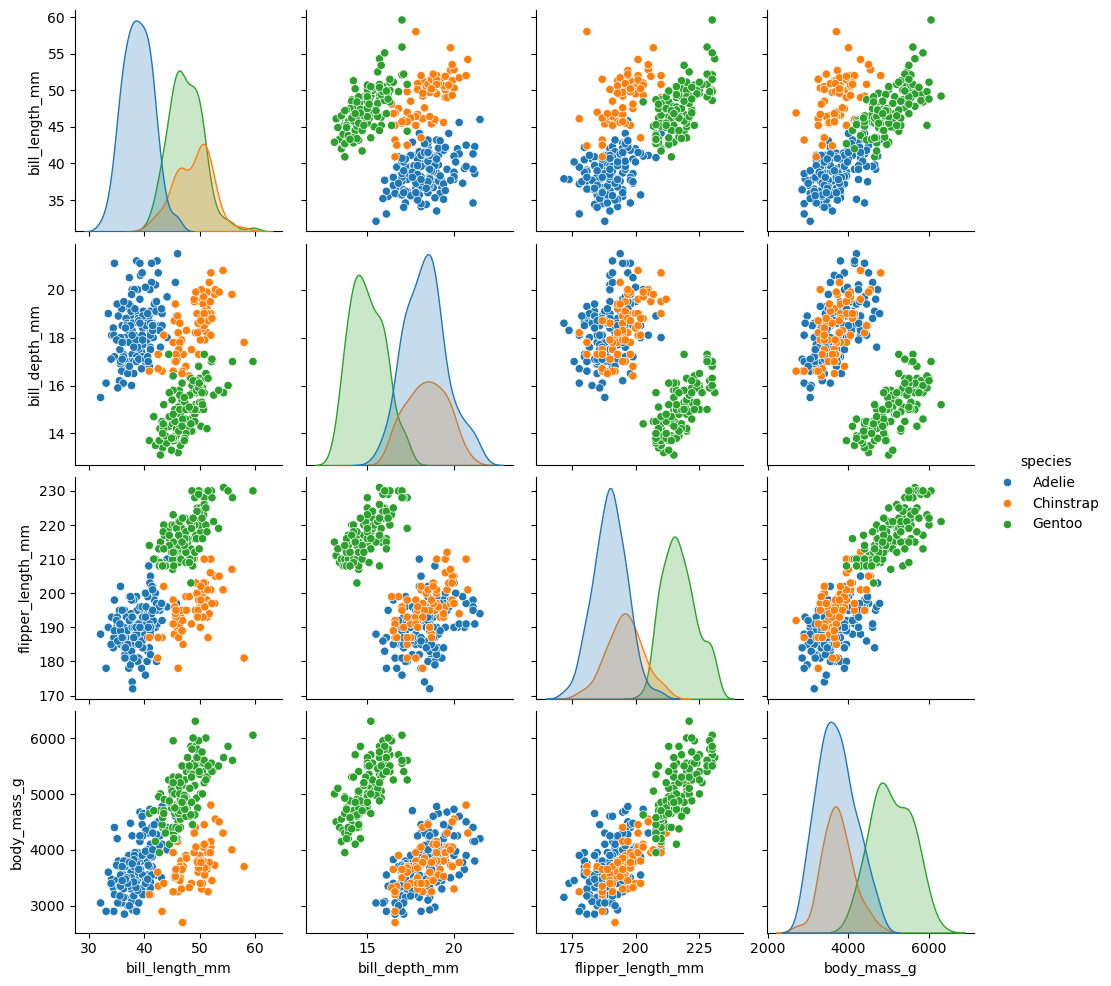

In [5]:
sns.pairplot(penguins, hue="species")

### Analysis
- The green class, Gentoo is somewhat more easily distinguishable from the other two
- The other two classes seem to be separable by a combination of bill length and bill depth, or bill length and flipper length

### Identified in our data our target variable (dependent variable) and our features/attributes (independent variables)
- Target: `species`
- Features: `bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g, island, sex`

## 3. Prepare data

(Most) Machine learning libraries only take numerical values without missing (NaN) values, what can we do?
- Drop categorical/text features and all rows with missing values (at the price of losing valuable data)
- Transform categorical features to numerical. Most simple method: one-hot encoding (also called dummy variable encoding)
- Fill missing values (imputation). Simple: Replace NaN with the average of the feature

### Prepare features

In [6]:
# Use only numerical features: bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g
## That's the same as dropping the categorical features
penguins_filtered = penguins.drop(columns=['island', 'sex'])

# Drop rows with NaNs
penguins_filtered = penguins_filtered.dropna()

# Our features are ready, we will keep all but our target variable 'species'
features = penguins_filtered.drop(columns=['species'])

### Prepare target variable

In [7]:
import pandas as pd

target = pd.get_dummies(penguins_filtered['species'])
target.head()

,Adelie,Chinstrap,Gentoo
0,True,False,False
1,True,False,False
2,True,False,False
4,True,False,False
5,True,False,False


### Split data into training and test sets

Depending on the amount of data you have, you'd aim to have a 70%/30% split for training/testing, or 80/20.
As we don't have a lot of data, let's do 80/20

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0, shuffle=True, stratify=target)

- Notice `random_state`. This ensures our train/test split is the same every time we run the code
- `stratify` tries to keep a similar proportion of classes between the train and test splits

## 4. Build an architecture from scratch

`keras` is a high-level framework from TensorFlow. `keras` is more user-friendly for beginners. TensorFlow is more complex and has more functionality and customization

In [9]:
from tensorflow import keras

# Like before, set our seed so we have the same results every time we run the code
keras.utils.set_random_seed(2)

2026-01-26 16:47:13.244822: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2026-01-26 16:47:13.273773: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2026-01-26 16:47:13.818395: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [10]:
y_train

,Adelie,Chinstrap,Gentoo
195,False,True,False
138,True,False,False
333,False,False,True
327,False,False,True
20,True,False,False
...,...,...,...
183,False,True,False
336,False,False,True
286,False,False,True
302,False,False,True


Building a simple model with:
- Our usual input and output layers.
- Only 1 hidden layer, with 10 neurons with 'relu' activation function.
- Using `softmax` in our output layer ensures we have an output in the range (0,1), and they sum to 1. Kind of like a probability.

In [11]:
# Input layer
inputs = keras.Input(shape=(X_train.shape[1],))

# Hidden layers
hidden_layer = keras.layers.Dense(10, activation="relu")(inputs)

# Output layer
output_layer = keras.layers.Dense(3, activation="softmax")(hidden_layer)

2026-01-26 16:47:14.089958: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [12]:
# Show our model summary
model = keras.Model(inputs=inputs, outputs=output_layer)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 83 (332.00 B)

 Trainable params: 83 (332.00 B)

 Non-trainable params: 0 (0.00 B)

## 5. Choose a loss function and optimizer

For the loss function:
- It tells the training algorithm how wrong, or how ‘far away’ from the true value the predicted value is.
- Categorical Crossentropy is suitable for our situation, where we have a `softmax` activation function in the output layer

For the optimizer:
- Method that our deep learning model will use to learn from the data and improve on each iteration
- Adam is the default, and widely used option.

In [13]:
model.compile(optimizer='adam', loss=keras.losses.CategoricalCrossentropy())

## 6. Train model

Once we have defined our model, we'll train it with our training dataset. The training is also called `fitting` our model to our data

In [14]:
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 623.0577  
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 519.2202 
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 413.6821 
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 305.6798 
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 206.9116 
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 130.0824 
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 57.9688  
Epoch 8/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30.3862 
Epoch 9/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16.9243 
Epoch 10/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.3335 
Epoch 11/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15.8973 
Epoch 12/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.6442 
Epoch 13/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.9737 
Epoch 14/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.2201 
Epoch 15/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14.50

<Axes: >

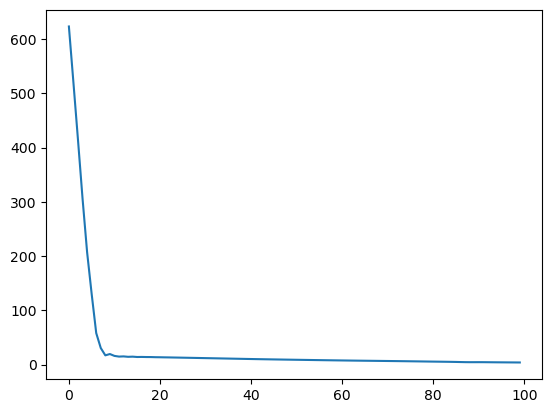

In [15]:
# See how the loss decreases (our model learns from the data) as our model looks again at the data after each epoch
sns.lineplot(x=history.epoch, y=history.history['loss'])

## 7. Perform a prediction/classification

Now it's time to test how well our model does with data it hasn't seen, our test data

In [16]:
# Using our train model, predict
y_pred = model.predict(X_test)

# Transform to a dataframe
prediction = pd.DataFrame(y_pred, columns=target.columns)
prediction

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


,Adelie,Chinstrap,Gentoo
0,0.999997,3.052568e-06,3.197025e-07
1,0.988952,1.051521e-02,5.329678e-04
2,0.999905,9.426670e-05,1.243060e-06
3,0.997219,1.081789e-03,1.698883e-03
4,0.857276,6.667334e-02,7.605045e-02
...,...,...,...
64,0.013074,9.671546e-01,1.977111e-02
65,0.204542,7.900468e-01,5.411084e-03
66,0.107231,5.038240e-01,3.889450e-01
67,0.999680,5.595804e-05,2.641084e-04


In [17]:
# Get the class/penguin species with the highest likelihood
predicted_species = prediction.idxmax(axis="columns")
predicted_species

0        Adelie
1        Adelie
2        Adelie
3        Adelie
4        Adelie
        ...    
64    Chinstrap
65    Chinstrap
66    Chinstrap
67       Adelie
68       Adelie
Length: 69, dtype: object

## 8. Measuring performance

In [19]:
from sklearn.metrics import confusion_matrix

true_species = y_test.idxmax(axis="columns")

matrix = confusion_matrix(true_species, predicted_species)
print(matrix)

[[16 14  0]
 [ 3  4  7]
 [25  0  0]]


In [20]:
# Convert to a pandas dataframe
confusion_df = pd.DataFrame(matrix, index=y_test.columns.values, columns=y_test.columns.values)

# Set the names of the x and y axis, this helps with the readability of the heatmap.
confusion_df.index.name = 'True Label'
confusion_df.columns.name = 'Predicted Label'
confusion_df.head()

Predicted Label,Adelie,Chinstrap,Gentoo
True Label,,,
Adelie,16,14,0
Chinstrap,3,4,7
Gentoo,25,0,0


<Axes: xlabel='Predicted Label', ylabel='True Label'>

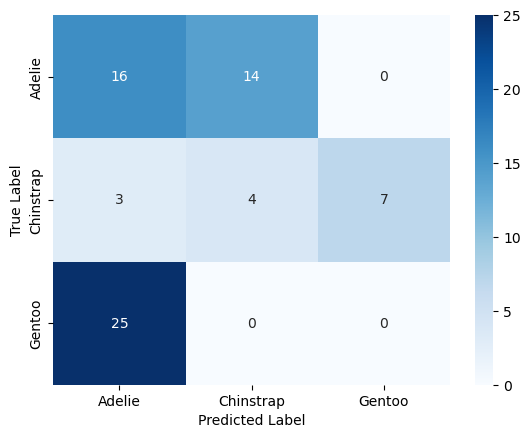

In [21]:
sns.heatmap(confusion_df, annot=True, cmap='Blues')

What is the accurracy in the train and test sets?
Why do you think the accurracy is higher on the train set?

(Accuracy: correctly classified observations as a proportion of the total number of observations)

## 9. Refine the model

We'll do this in one minute as a challenge. Ways you can build a new model:
- Add more hidden layers
- Change the number of neurons
- Change the features that the models uses to learn

## 10. Share model 

In [22]:
model.save('my_first_model.keras')

# Now do it all over again

Try one of the options outlined in step 9. How does the accuracy of your refined model compares to our baseline model?